In [0]:
import pandas as pd
from collections import Counter
import numpy as np
from IPython.core.display import HTML

In [2]:
df_train = pd.read_json('train.json')
df_train.head()

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

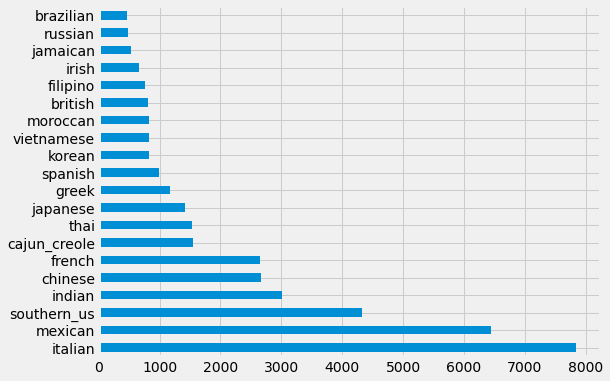

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df_train['cuisine'].value_counts().plot(kind='barh', figsize=(8,6));


In [0]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [5]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [6]:
    top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
print((top10.head(8)))

             top1       top2  ...             top9                top10
greek        salt  olive oil  ...           garlic               pepper
southern_us  salt     butter  ...             milk           buttermilk
filipino     salt     garlic  ...          carrots  ground black pepper
indian       salt     onions  ...    vegetable oil                  oil
jamaican     salt     onions  ...     black pepper        garlic cloves
spanish      salt  olive oil  ...  red bell pepper               pepper
italian      salt  olive oil  ...            water               butter
mexican      salt     onions  ...          avocado       corn tortillas

[8 rows x 10 columns]


In [7]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()

id  ...                                    all_ingredients
0  10259  ...  romaine lettuce;black olives;grape tomatoes;ga...
1  25693  ...  plain flour;ground pepper;salt;tomatoes;ground...
2  20130  ...  eggs;pepper;salt;mayonaise;cooking oil;green c...
3  22213  ...                     water;vegetable oil;wheat;salt
4  13162  ...  black pepper;shallots;cornflour;cayenne pepper...

[5 rows x 4 columns]

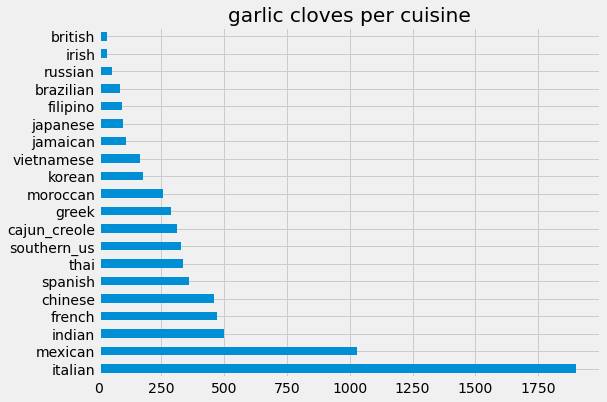

In [8]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().plot(kind='barh',
                                                 title='garlic cloves per cuisine',
                                                 figsize=(8,6));

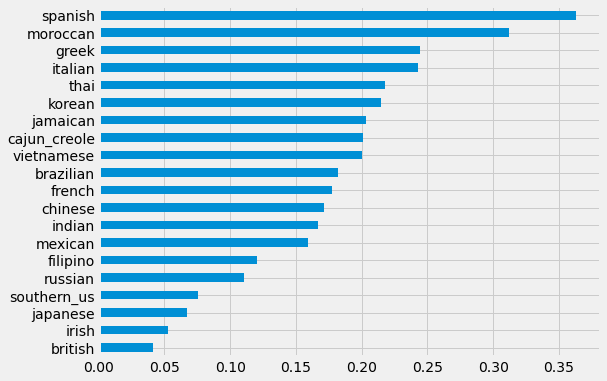

In [9]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='barh',figsize=(8,6));

In [10]:
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

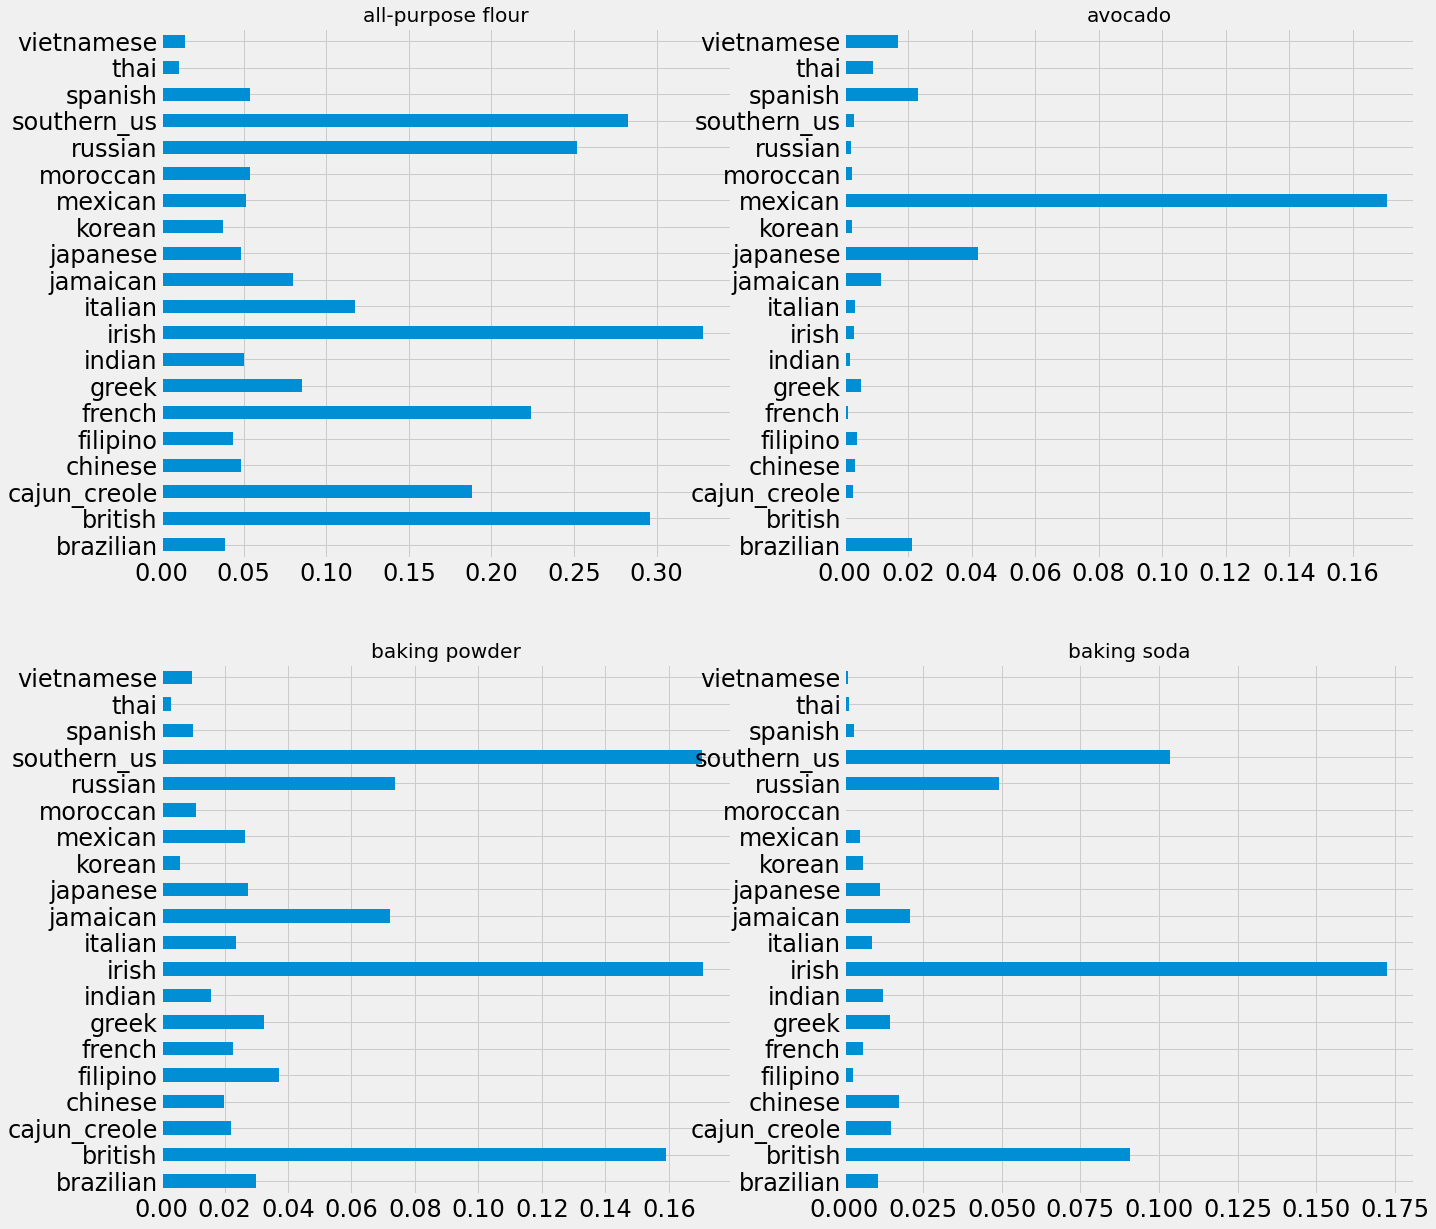

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(4)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(
        kind='barh',
        ax=axes.ravel()[ax_index], fontsize=24,title=ingredient);